<a href="https://colab.research.google.com/github/Xemarij/Computer-Vision/blob/main/6_Scaling%2C_Re_sizing%2C_Interpolations_and_Cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/logo_MCV_W.png)


# **Scaling, Re-sizing, Interpolations and Cropping**

**In this lesson we'll learn:**
1. How to re-size and scale images
2. Image Pyramids
3. Cropping

### **Re-sizing**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

Downloading...
From: https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 90.1MB/s]


### **Types of re-scaling Methods in OpenCV**

- **INTER_NEAREST** – a nearest-neighbor interpolation
- **INTER_LINEAR** – a bilinear interpolation (used by default)
- **INTER_AREA** – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
- **INTER_CUBIC** – a bicubic interpolation over 4×4 pixel neighborhood
- **INTER_LANCZOS4** – a Lanczos interpolation over 8×8 pixel neighborhood

See more on their performance - https://chadrick-kwag.net/cv2-resize-interpolation-methods/

**Give Python cv2 code to resize the image to 3/4 of its orginal size with INTER_Linear interpolation and display it with matplotlib.**

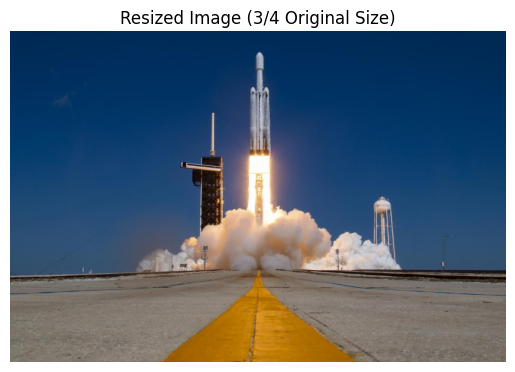

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/4.jpg')

# Resize the image to 3/4 of its original size using INTER_LINEAR interpolation
resized_img = cv2.resize(img, None, fx=0.75, fy=0.75, interpolation=cv2.INTER_LINEAR)

# Convert the BGR image to RGB for matplotlib display
resized_img_rgb1 = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the resized image using matplotlib
plt.imshow(resized_img_rgb1)
plt.title('Resized Image (3/4 Original Size)')
plt.axis('off')
plt.show()

**Give Python cv2 code to double the size of the image of its orginal size with INTER_CUBIC interpolation and also display the original image it with matplotlib.**

Original Image Size: (853, 1280, 3)
Resized Image Size: (1706, 2560, 3)


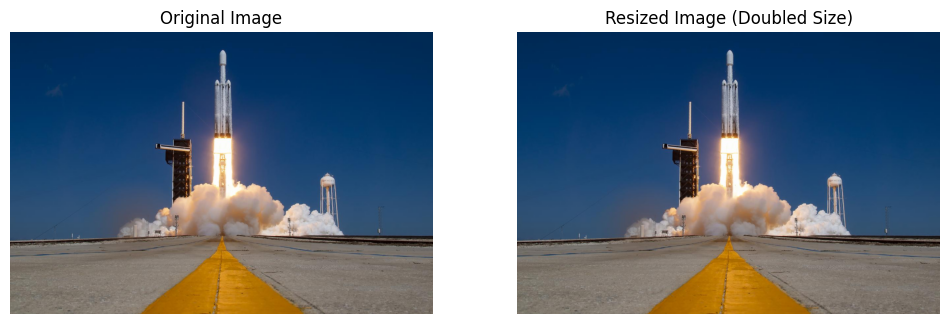

In [7]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/4.jpg')

# Double the size of the image using INTER_CUBIC interpolation
resized_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Convert BGR images to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb_size = img_rgb.shape
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img_rgb_size = resized_img_rgb.shape

# Print the original and resized image sizes
print("Original Image Size:", img_rgb_size)
print("Resized Image Size:", resized_img_rgb_size)

# Display the original and resized images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_rgb)
plt.title('Resized Image (Doubled Size)')
plt.axis('off')

plt.show()

**Give Python cv2 code to double the size of the image of its orginal size with INTER_NEAREST interpolation and also display the original image it with matplotlib. Also display their sizes.**

Original Image Size: 853 x 1280
Resized Image Size: 1706 x 2560


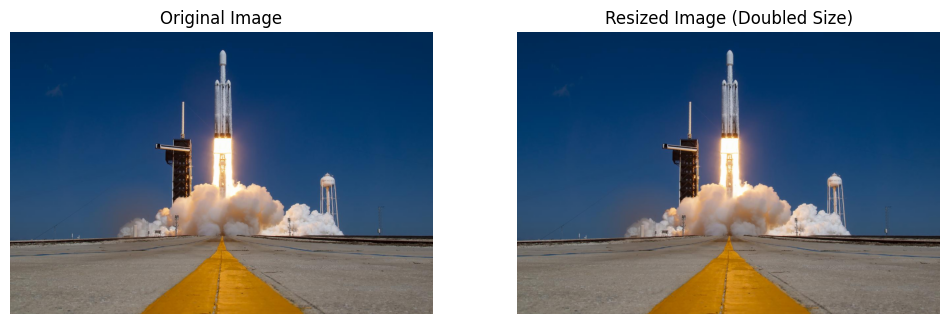

In [9]:
# Load the image
img = cv2.imread('./images/4.jpg')

# Get the original image dimensions
height, width, channels = img.shape
print("Original Image Size:", height, "x", width)

# Double the size of the image using INTER_NEAREST interpolation
resized_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_NEAREST)

# Get the resized image dimensions
height_resized, width_resized, channels_resized = resized_img.shape
print("Resized Image Size:", height_resized, "x", width_resized)

# Convert BGR images to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the original and resized images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_rgb)

plt.title('Resized Image (Doubled Size)')
plt.axis('off')

plt.show()

**Give Python cv2 code to resize the image with INTER_AREA method by resizing to (900, 400) and diplay the original and the resized image with matplotlib also display their sizes.**

Original Image Size: 853 x 1280
Resized Image Size: 400 x 900


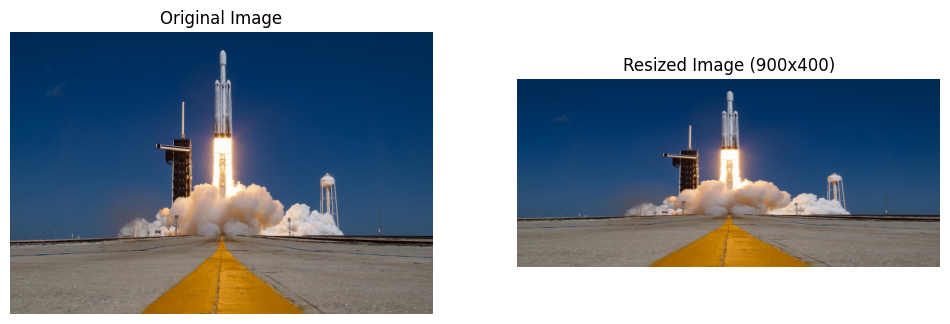

In [10]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('./images/4.jpg')

# Get the original image dimensions
height, width, channels = img.shape
print("Original Image Size:", height, "x", width)

# Resize the image to (900, 400) using INTER_AREA interpolation
resized_img = cv2.resize(img, (900, 400), interpolation=cv2.INTER_AREA)

# Get the resized image dimensions
height_resized, width_resized, channels_resized = resized_img.shape
print("Resized Image Size:", height_resized, "x", width_resized)

# Convert BGR images to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized_img_rgb = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

# Display the original and resized images side by side
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_rgb)
plt.title('Resized Image (900x400)')
plt.axis('off')

plt.show()

## **Image Pyraminds**
Image Pyramids is a faster method to scale up or scale down an image.

Original Image Size: 853 x 1280
Scaled Up Image Size: 1706 x 2560
Scaled Down Image Size: 427 x 640


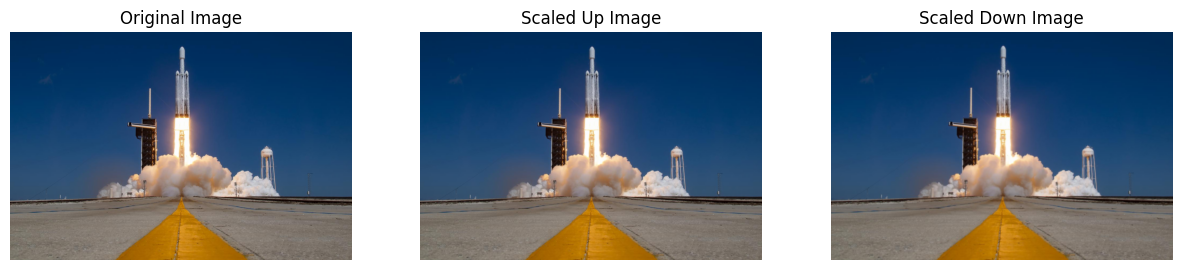

In [11]:

# Load the image
img = cv2.imread('./images/4.jpg')

# Get the original image dimensions
height, width, channels = img.shape
print("Original Image Size:", height, "x", width)

# Scale up the image using pyrUp
img_up = cv2.pyrUp(img)

# Scale down the image using pyrDown
img_down = cv2.pyrDown(img)

# Get the dimensions of all images
height_up, width_up, channels_up = img_up.shape
height_down, width_down, channels_down = img_down.shape

print("Scaled Up Image Size:", height_up, "x", width_up)
print("Scaled Down Image Size:", height_down, "x", width_down)

# Convert BGR images to RGB for matplotlib display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_up_rgb = cv2.cvtColor(img_up, cv2.COLOR_BGR2RGB)
img_down_rgb = cv2.cvtColor(img_down, cv2.COLOR_BGR2RGB)

# Display the images
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_up_rgb)
plt.title('Scaled Up Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_down_rgb)
plt.title('Scaled Down Image')
plt.axis('off')

plt.show()

# **Cropping**

**write python cv2 code to crop a rectangular area from an image and display both images with matplotlib. Also create a cropping recatngle on the orginal image and display the image also.**

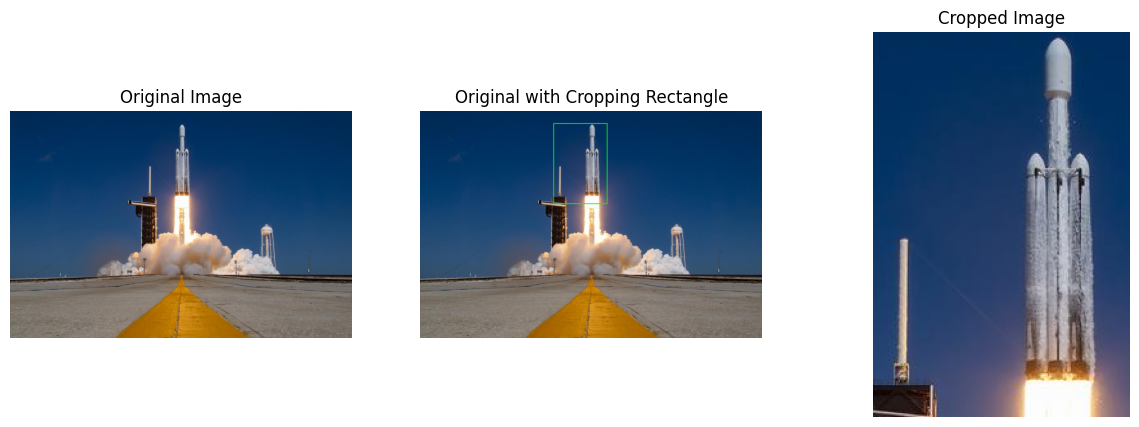

In [18]:

# Load the image
image = cv2.imread('./images/4.jpg')

# Define the coordinates of the top-left corner and width/height of the rectangle
x, y, width, height = 500, 50, 200,   # Example values

# Draw the cropping rectangle on a copy of the original image
image_with_rect = image.copy()
cv2.rectangle(image_with_rect, (x, y), (x + width, y + height), (0, 255, 0), 2)  # Green rectangle, 2px thick

# Crop the rectangle from the image
cropped_image = image[y:y+height, x:x+width]

# Convert images to RGB for matplotlib display
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_with_rect_rgb = cv2.cvtColor(image_with_rect, cv2.COLOR_BGR2RGB)
cropped_image_rgb = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# Display all images using matplotlib
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Original image with cropping rectangle
plt.subplot(1, 3, 2)
plt.imshow(image_with_rect_rgb)
plt.title('Original with Cropping Rectangle')
plt.axis('off')

# Cropped image
plt.subplot(1, 3, 3)
plt.imshow(cropped_image_rgb)
plt.title('Cropped Image')
plt.axis('off')

# Show the plots
plt.show()

# Show the plots
plt.show()
